In [4]:
%pip install intel-tensorflow
%pip install keras
%pip install pandas
%pip install intel-numpy
%pip install tqdm
%pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement intel-numpy (from versions: none)
ERROR: No matching distribution found for intel-numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# oneAPI Packagaes

intel-tensorflow

intel-numpy

opencv-python-headless

In [5]:
%pip install intel_extension_for_tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import cv2
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

In [7]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['images'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)

                               images     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['images'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)
print(test['images'])

                             images     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [13]:
from tqdm.notebook import tqdm

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        if os.path.isfile(image):  # Check if the path is a regular file
            img = load_img(image, grayscale=True)
            img = np.array(img)
            features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [15]:
train_features = extract_features(train['images'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\mmmeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [16]:
test_features = extract_features(test['images'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [23]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [24]:
y_train_processed = y_train
model.fit(x=x_train, y=y_train_processed, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
226/226 [==============================] - 469s 2s/step - loss: 1.8225 - accuracy: 0.2436 - val_loss: 1.8004 - val_accuracy: 0.2620
Epoch 2/50
226/226 [==============================] - 465s 2s/step - loss: 1.7911 - accuracy: 0.2544 - val_loss: 1.7246 - val_accuracy: 0.2850
Epoch 3/50
226/226 [==============================] - 465s 2s/step - loss: 1.6876 - accuracy: 0.3142 - val_loss: 1.5461 - val_accuracy: 0.4009
Epoch 4/50
226/226 [==============================] - 462s 2s/step - loss: 1.5457 - accuracy: 0.3955 - val_loss: 1.4444 - val_accuracy: 0.4408
Epoch 5/50
226/226 [==============================] - 432s 2s/step - loss: 1.4623 - accuracy: 0.4306 - val_loss: 1.3376 - val_accuracy: 0.4881
Epoch 6/50
226/226 [==============================] - 440s 2s/step - loss: 1.4103 - accuracy: 0.4569 - val_loss: 1.3052 - val_accuracy: 0.5004
Epoch 7/50
226/226 [==============================] - 440s 2s/step - loss: 1.3740 - accuracy: 0.4705 - val_loss: 1.2690 - val_accuracy: 0.5132

In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

c:\Users\mmmeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from keras.models import model_from_json

In [27]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [30]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


c:\Users\mmmeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 283ms/step
model prediction is  sad


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 30ms/step
model prediction is  sad


c:\Users\mmmeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


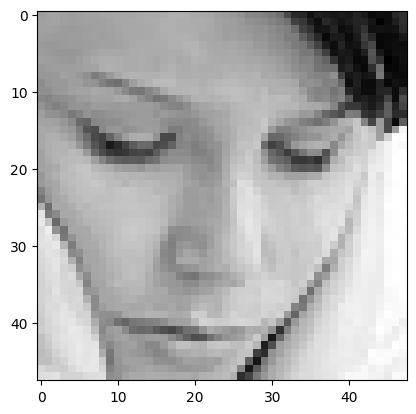

In [32]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear


1/1 [==============================] - 0s 34ms/step
model prediction is  sad


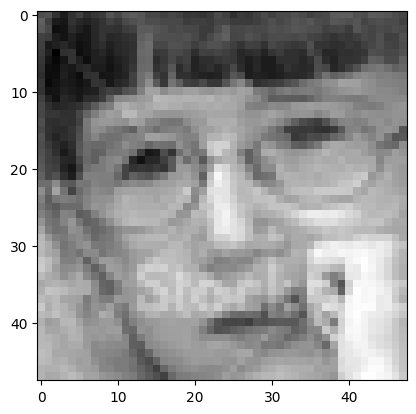

In [33]:
image = 'images/train/fear/10451.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 31ms/step
model prediction is  disgust


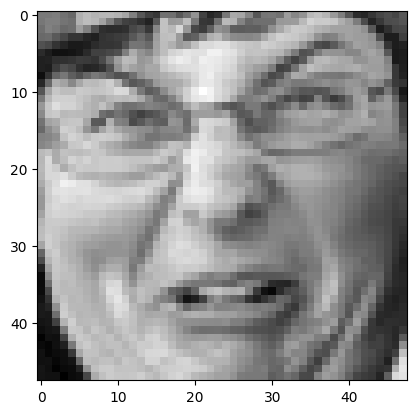

In [34]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 34ms/step
model prediction is  happy


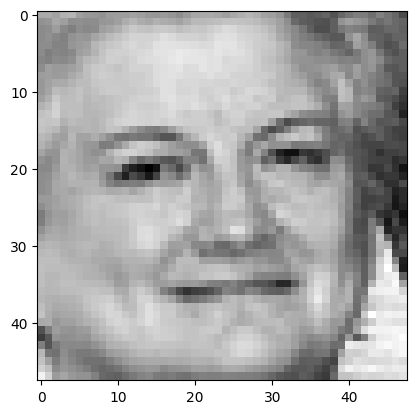

In [35]:
image = 'images/train/happy/100.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 36ms/step
model prediction is  surprise


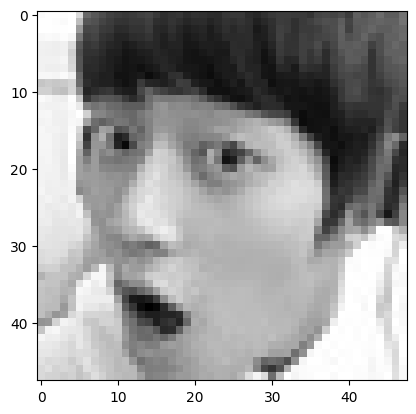

In [36]:
image = 'images/train/surprise/10080.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [37]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img

json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("facialemotionmodel.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

KeyboardInterrupt: 